In [3]:
import random
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
random.seed(1234)
#load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#transform image data into 2d-tensor
x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/ 255

#make y categorical type
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#split train set into train sand validation
x_train_50000, x_val, y_train_50000, y_val = train_test_split(x_train, y_train, test_size = 1/6, random_state = 1)

#check shapes
print(x_train.shape, y_train.shape, 
      x_train_50000.shape, y_train_50000.shape,
      x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (50000, 784) (50000, 10) (10000, 784) (10000, 10) (10000, 784) (10000, 10)


In [5]:
#initialize sequential models with 5 layers + 512 hidden units for each layer
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(784,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#epoch should be 200
history = model.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 300,
                    validation_data = (x_val, y_val),verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


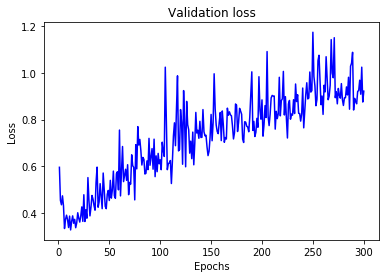

In [6]:
#Plotting the validation set loss over the epochs
history_dict = history.history
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, val_loss_values, 'b', label = "Validation loss")
plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

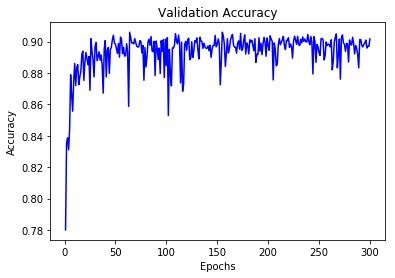

In [7]:
plt.clf()
#Plotting the validation set accuracy over the epochs
plt.plot(epochs, val_acc_values, 'b', label = "Validation acc")
plt.title("Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()

 * It seems that epoch equlas 150 is a reasonable choice. 

2. Implement dropout

In [8]:
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(512, activation = 'relu', input_shape=(784,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation = 'relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation = 'relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation = 'relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation = 'relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(10, activation = 'softmax'))

model_dropout.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#x_train_partial --> x_train, y_train_partial --> y_train (the same for validation data later)
#epoch should be 200
dropout_history = model_dropout.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 300,
                    validation_data = (x_val, y_val), verbose = 0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


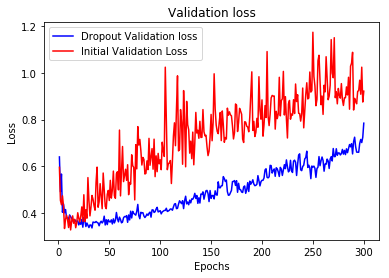

In [9]:
#Plotting the validation set loss over the epochs
dropout_history_dict = dropout_history.history
dropout_val_loss_values = dropout_history_dict['val_loss']
dropout_val_acc_values = dropout_history_dict['val_acc']
epochs = range(1, len(dropout_val_loss_values) + 1)

plt.plot(epochs, dropout_val_loss_values, 'b', label = "Dropout Validation loss")
plt.plot(epochs, val_loss_values, 'r', label = "Initial Validation Loss")
plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

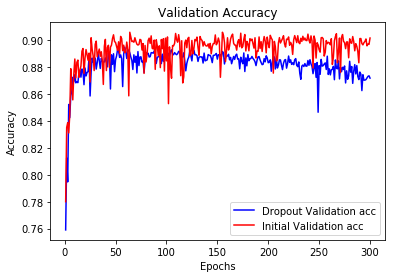

In [10]:
plt.clf()
#Plotting the validation set accuracy over the epochs
plt.plot(epochs, dropout_val_acc_values, 'b', label = "Dropout Validation acc")
plt.plot(epochs, val_acc_values, 'r', label = "Initial Validation acc")
plt.title("Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 * I think the dropout model is better than the initial model in terms of minimizing the validation loss. But the validation accuracy of the two models does not look different. Moreover, the accuracy of the dropout model is lower than tha of the initial model after 200 epochs. 

3. Weight regularization

In [11]:
#L1 reg model
model_reg1 = models.Sequential()
model_reg1.add(layers.Dense(512, activation = 'relu', 
                            input_shape=(784,),
                            kernel_regularizer = regularizers.l1(0.001)))
model_reg1.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l1(0.001)))
model_reg1.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l1(0.001)))
model_reg1.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l1(0.001)))
model_reg1.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l1(0.001)))
model_reg1.add(layers.Dense(10, activation = 'softmax'))

model_reg1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#x_train_partial --> x_train, y_train_partial --> y_train (the same for validation data later)
#epoch should be 200

#L2 reg model
model_reg2 = models.Sequential()
model_reg2.add(layers.Dense(512, activation = 'relu', 
                            input_shape=(784,),
                            kernel_regularizer = regularizers.l2(0.001)))
model_reg2.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l2(0.001)))
model_reg2.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l2(0.001)))
model_reg2.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l2(0.001)))
model_reg2.add(layers.Dense(512, activation = 'relu', 
                            kernel_regularizer = regularizers.l2(0.001)))
model_reg2.add(layers.Dense(10, activation = 'softmax'))

model_reg2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


history_reg1 = model_reg1.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 300,
                    validation_data = (x_val, y_val), verbose = 0)

history_reg2 = model_reg2.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 300,
                    validation_data = (x_val, y_val), verbose = 0)

reg1_history_dict = history_reg1.history
reg1_val_loss_values = reg1_history_dict['val_loss']
reg1_val_acc_values = reg1_history_dict['val_acc']

reg2_history_dict = history_reg2.history
reg2_val_loss_values = reg2_history_dict['val_loss']
reg2_val_acc_values = reg2_history_dict['val_acc']

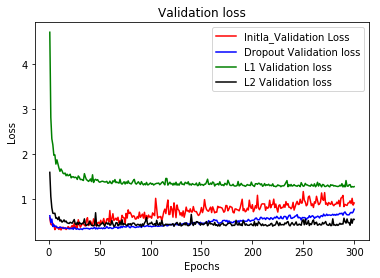

In [12]:
#Plotting the validation set loss over the epochs
plt.clf()
plt.plot(epochs, val_loss_values, 'r', label = "Initla_Validation Loss")
plt.plot(epochs, dropout_val_loss_values, 'b', label = "Dropout Validation loss")
plt.plot(epochs, reg1_val_loss_values, 'g', label = "L1 Validation loss")
plt.plot(epochs, reg2_val_loss_values, 'k', label = "L2 Validation loss")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

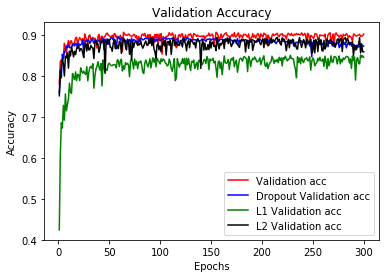

In [13]:
#Plotting the validation set accuracy over the epoch
plt.clf()
plt.plot(epochs, val_acc_values, 'r', label = "Validation acc")
plt.plot(epochs, dropout_val_acc_values, 'b', label = "Dropout Validation acc")
plt.plot(epochs, reg1_val_acc_values, 'g', label = "L1 Validation acc")
plt.plot(epochs, reg2_val_acc_values, 'k', label = "L2 Validation acc")

plt.title("Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 * Here we can see that the L2 model performs better than L1 model. 